In [23]:
import pyedflib
import numpy as np
import matplotlib.pyplot as plt

# Load the EDF file
file_path = "./Dataset/s01.edf"
edf_reader = pyedflib.EdfReader(file_path)

# Extract signal and metadata
num_signals = edf_reader.signals_in_file
signal_labels = edf_reader.getSignalLabels()
sampling_rate = edf_reader.getSampleFrequency(0)  # Assuming uniform sampling rate

# Extract the first signal as an example
signal = edf_reader.readSignal(0)
edf_reader.close()

print(f"Signal Length: {len(signal)}, Sampling Rate: {sampling_rate} Hz")


Signal Length: 211250, Sampling Rate: 250.0 Hz


EEG signals are often noisy, containing powerline interference (typically 50 Hz or 60 Hz). Use a bandpass filter to isolate frequencies in the range relevant for brainwave analysis (typically 0.5 Hz to 50 Hz).

In [24]:
from scipy.signal import butter, filtfilt

def bandpass_filter(data, lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, data)

# Apply the filter to the EEG signal (for example: 0.5 Hz to 50 Hz)
filtered_signal = bandpass_filter(signal, 0.5, 50, sampling_rate)


In [25]:
def apply_window(signal, window_type='hann'):
    window = np.hanning(len(signal)) if window_type == 'hann' else np.ones(len(signal))
    return signal * window

windowed_signal = apply_window(filtered_signal)

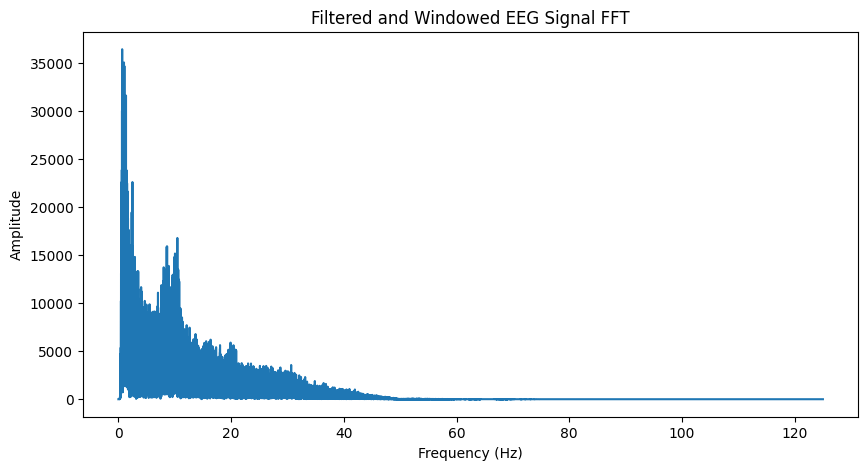

In [31]:
fft_values = np.fft.fft(windowed_signal)
fft_freq = np.fft.fftfreq(len(windowed_signal), d=1/sampling_rate)

# Keep positive frequencies
positive_freqs = fft_freq[:len(fft_freq)//2]
positive_fft_values = np.abs(fft_values[:len(fft_values)//2])

plt.figure(figsize=(10, 5))
plt.plot(positive_freqs, positive_fft_values)
plt.title("Filtered and Windowed EEG Signal FFT")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.show()


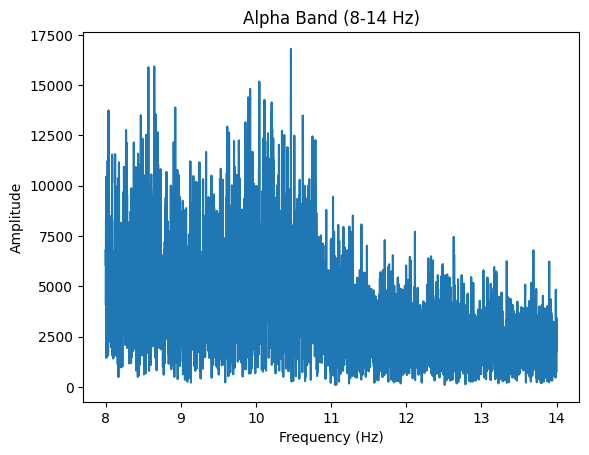

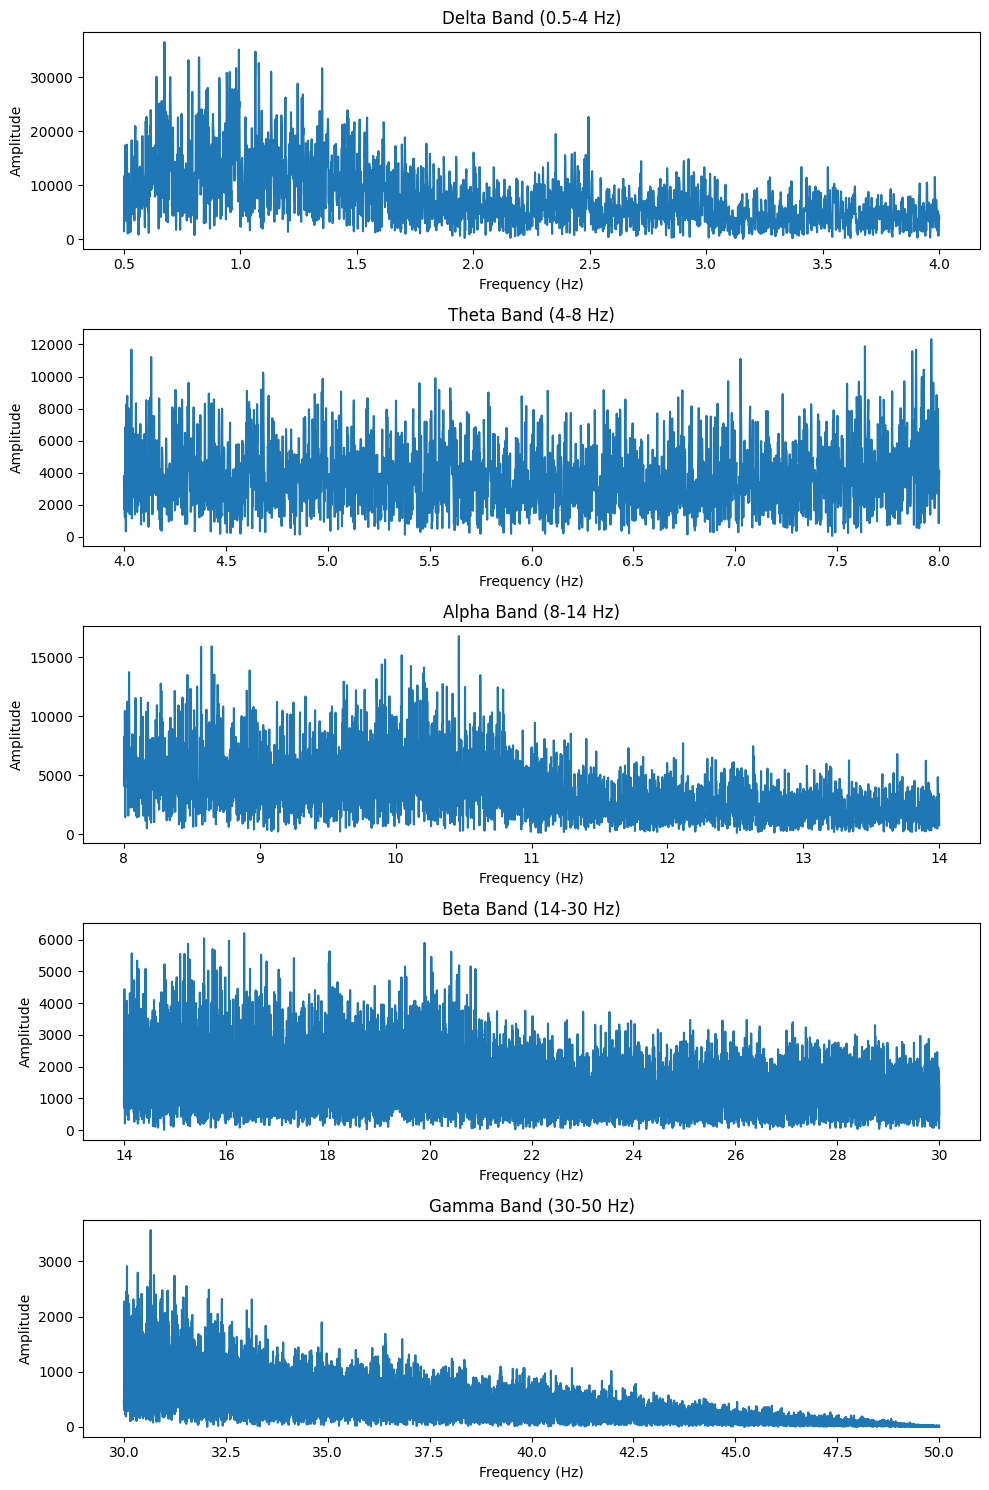

In [ ]:
def extract_band(fft_freqs, fft_values, band):
    """Extracts amplitude values for a given frequency band."""
    idx_band = np.where((fft_freqs >= band[0]) & (fft_freqs <= band[1]))
    return fft_freqs[idx_band], fft_values[idx_band]

# Extract specific brainwave bands
delta_freqs, delta_values = extract_band(positive_freqs, positive_fft_values, (0.5, 4))
theta_freqs, theta_values = extract_band(positive_freqs, positive_fft_values, (4, 8))
alpha_freqs, alpha_values = extract_band(positive_freqs, positive_fft_values, (8, 14))
beta_freqs, beta_values = extract_band(positive_freqs, positive_fft_values, (14, 30))
gamma_freqs, gamma_values = extract_band(positive_freqs, positive_fft_values, (30, 50))

plt.plot(alpha_freqs, alpha_values)
plt.title("Alpha Band (8-14 Hz)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.show()


# Plot each frequency band
fig, axs = plt.subplots(5, 1, figsize=(10, 15))

# Delta Band
axs[0].plot(delta_freqs, delta_values)
axs[0].set_title("Delta Band (0.5-4 Hz)")
axs[0].set_xlabel("Frequency (Hz)")
axs[0].set_ylabel("Amplitude")

# Theta Band
axs[1].plot(theta_freqs, theta_values)
axs[1].set_title("Theta Band (4-8 Hz)")
axs[1].set_xlabel("Frequency (Hz)")
axs[1].set_ylabel("Amplitude")

# Alpha Band
axs[2].plot(alpha_freqs, alpha_values)
axs[2].set_title("Alpha Band (8-14 Hz)")
axs[2].set_xlabel("Frequency (Hz)")
axs[2].set_ylabel("Amplitude")

# Beta Band
axs[3].plot(beta_freqs, beta_values)
axs[3].set_title("Beta Band (14-30 Hz)")
axs[3].set_xlabel("Frequency (Hz)")
axs[3].set_ylabel("Amplitude")

# Gamma Band
axs[4].plot(gamma_freqs, gamma_values)
axs[4].set_title("Gamma Band (30-50 Hz)")
axs[4].set_xlabel("Frequency (Hz)")
axs[4].set_ylabel("Amplitude")

# Adjust layout
plt.tight_layout()
plt.show()

In [27]:
# Load the EDF file
file_path = "./Dataset/h01.edf"
edf_reader = pyedflib.EdfReader(file_path)

# Extract signal and metadata
num_signals = edf_reader.signals_in_file
signal_labels = edf_reader.getSignalLabels()
sampling_rate = edf_reader.getSampleFrequency(0)  # Assuming uniform sampling rate

# Extract the first signal as an example
signal = edf_reader.readSignal(0)
edf_reader.close()

print(f"Signal Length: {len(signal)}, Sampling Rate: {sampling_rate} Hz")


Signal Length: 231250, Sampling Rate: 250.0 Hz


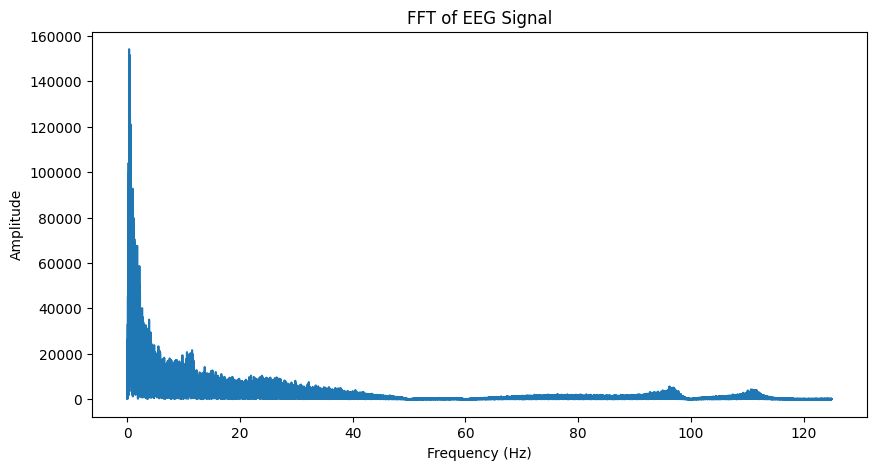

In [28]:
# Apply FFT
fft_values = np.fft.fft(signal)
fft_freq = np.fft.fftfreq(len(signal), d=1/sampling_rate)

# Keep only the positive frequencies
positive_freqs = fft_freq[:len(fft_freq)//2]
positive_fft_values = np.abs(fft_values[:len(fft_values)//2])

# Plot the FFT result
plt.figure(figsize=(10, 5))
plt.plot(positive_freqs, positive_fft_values)
plt.title("FFT of EEG Signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.show()

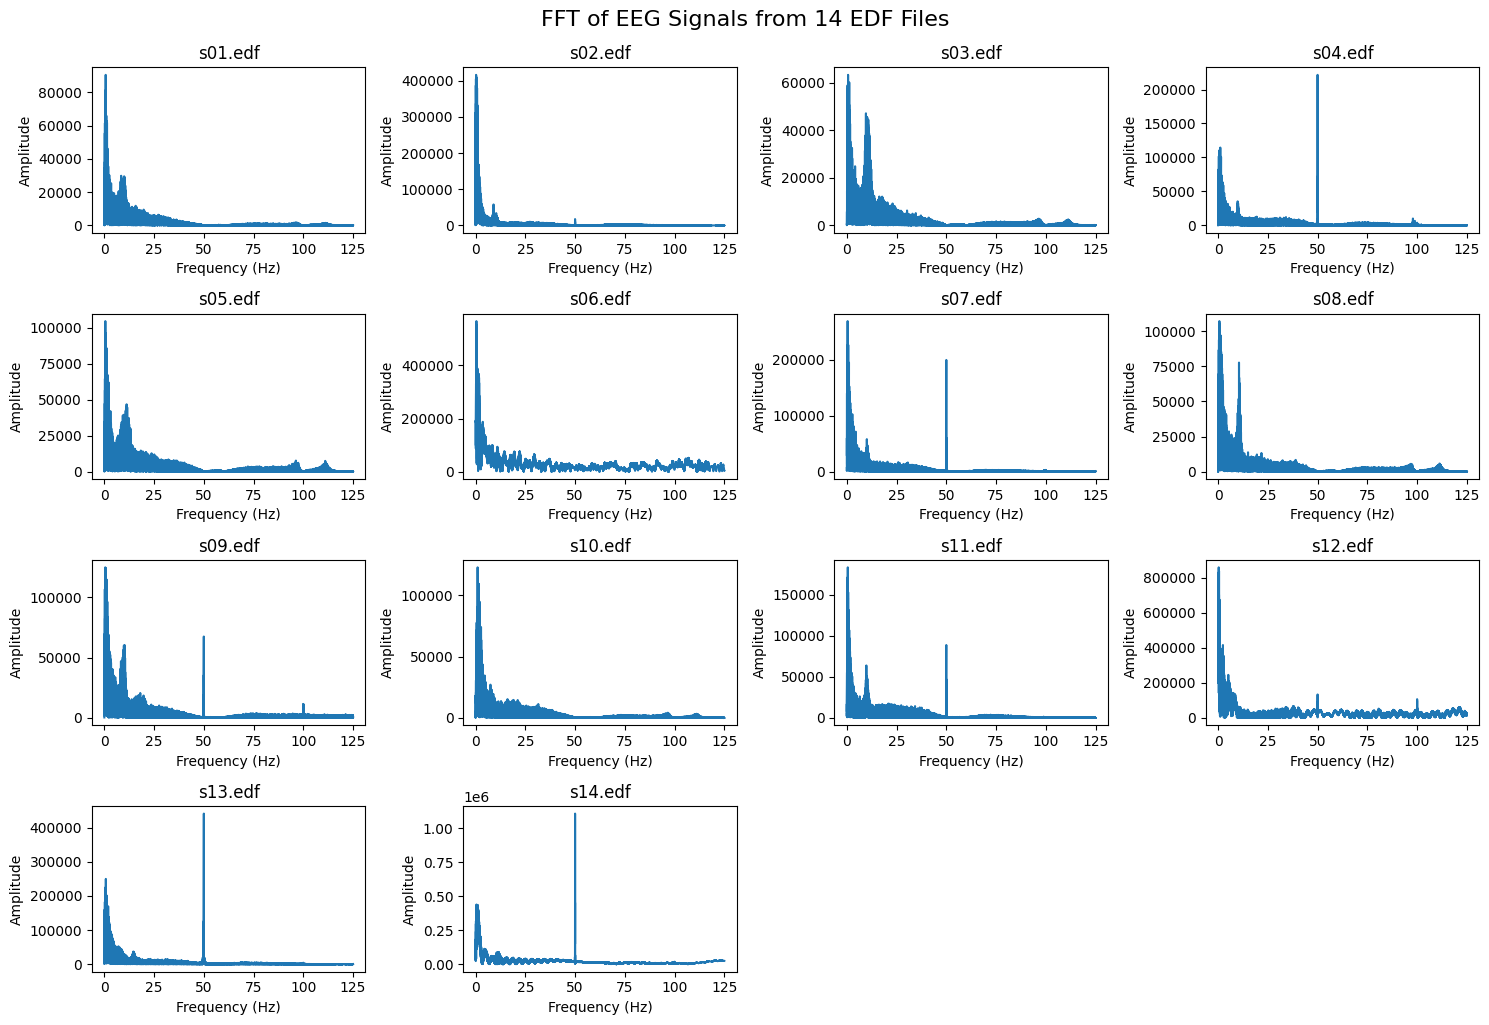

In [29]:
import pyedflib
import numpy as np
import matplotlib.pyplot as plt
import os

# Directory containing the EDF files
edf_directory = "./Dataset"

# List all EDF files (assuming filenames are s01.edf, s02.edf, ..., s14.edf)
edf_files = [f"s{str(i).zfill(2)}.edf" for i in range(1, 15)]

# Prepare plot
plt.figure(figsize=(15, 10))

# Process and plot each EDF file
for idx, file_name in enumerate(edf_files):
    file_path = os.path.join(edf_directory, file_name)
    
    try:
        edf_reader = pyedflib.EdfReader(file_path)
        
        # Extract signal and metadata
        signal = edf_reader.readSignal(0)  # Assuming signal index 0 for all files
        sampling_rate = edf_reader.getSampleFrequency(0)
        edf_reader.close()

        # Apply FFT
        fft_values = np.fft.fft(signal)
        fft_freq = np.fft.fftfreq(len(signal), d=1/sampling_rate)
        
        # Keep only the positive frequencies
        positive_freqs = fft_freq[:len(fft_freq)//2]
        positive_fft_values = np.abs(fft_values[:len(fft_values)//2])
        
        # Plot each file's FFT result
        plt.subplot(4, 4, idx + 1)  # Adjust grid size for 14 plots
        plt.plot(positive_freqs, positive_fft_values)
        plt.title(f"{file_name}")
        plt.xlabel("Frequency (Hz)")
        plt.ylabel("Amplitude")
        plt.tight_layout()

    except Exception as e:
        print(f"Error processing {file_name}: {e}")

# Show the plots
plt.suptitle("FFT of EEG Signals from 14 EDF Files", y=1.02, fontsize=16)
plt.show()


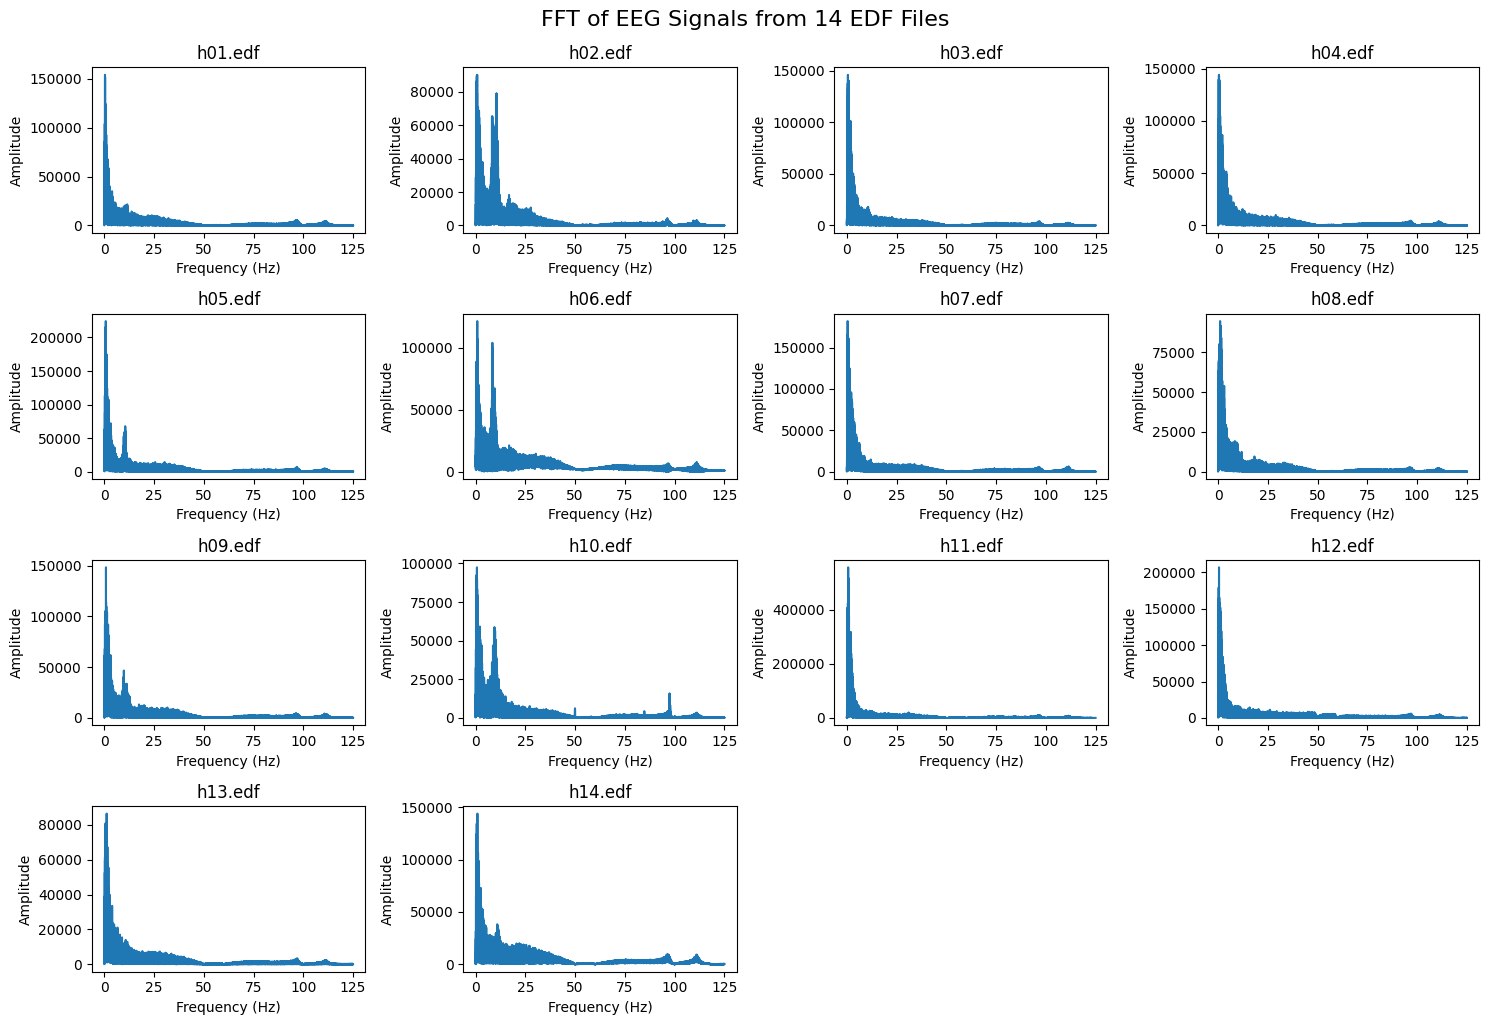

In [30]:
import pyedflib
import numpy as np
import matplotlib.pyplot as plt
import os

# Directory containing the EDF files
edf_directory = "./Dataset"

# List all EDF files (assuming filenames are s01.edf, s02.edf, ..., s14.edf)
edf_files = [f"h{str(i).zfill(2)}.edf" for i in range(1, 15)]

# Prepare plot
plt.figure(figsize=(15, 10))

# Process and plot each EDF file
for idx, file_name in enumerate(edf_files):
    file_path = os.path.join(edf_directory, file_name)
    
    try:
        edf_reader = pyedflib.EdfReader(file_path)
        
        # Extract signal and metadata
        signal = edf_reader.readSignal(0)  # Assuming signal index 0 for all files
        sampling_rate = edf_reader.getSampleFrequency(0)
        edf_reader.close()

        # Apply FFT
        fft_values = np.fft.fft(signal)
        fft_freq = np.fft.fftfreq(len(signal), d=1/sampling_rate)
        
        # Keep only the positive frequencies
        positive_freqs = fft_freq[:len(fft_freq)//2]
        positive_fft_values = np.abs(fft_values[:len(fft_values)//2])
        
        # Plot each file's FFT result
        plt.subplot(4, 4, idx + 1)  # Adjust grid size for 14 plots
        plt.plot(positive_freqs, positive_fft_values)
        plt.title(f"{file_name}")
        plt.xlabel("Frequency (Hz)")
        plt.ylabel("Amplitude")
        plt.tight_layout()

    except Exception as e:
        print(f"Error processing {file_name}: {e}")

# Show the plots
plt.suptitle("FFT of EEG Signals from 14 EDF Files", y=1.02, fontsize=16)
plt.show()
